<a href="https://www.kaggle.com/code/doggypiggy/titanic-top-5-0-79665-easy-to-understand?scriptVersionId=102191039" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Titanic - Top 5% Score - Easy to Understand

#### Thanks for checking out my Notebook! Feel free to copy and edit it on you own : )

#### If it's helpful to your learning process, please upvote so that more people can see it.

#### Also, please cite my name and [this link](https://www.kaggle.com/doggypiggy/top-5-score-easy-to-understand) if you plan to use this solution in a public notebook.

#### As always, all feedbacks and comments are welcome! Let me know if you have any idea for improvement.

#### Credit: this solution is based on ideas of [Gunes Evitan](https://www.kaggle.com/gunesevitan) and [Amer Wafiy](https://www.kaggle.com/amerwafiy)

## Imports

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

import string

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# Data Input
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
sub_example = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [3]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
186,187,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,NaN,Q
724,725,1,1,"Chambers, Mr. Norman Campbell",male,27.0,1,0,113806,53.1000,E8,S
162,163,0,3,"Bengtsson, Mr. John Viktor",male,26.0,0,0,347068,7.7750,NaN,S
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
132,133,0,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,0,A/5. 3337,14.5000,NaN,S


In [4]:
test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
244,1136,3,"Johnston, Master. William Arthur Willie""""",male,NaN,1,2,W./C. 6607,23.4500,NaN,S
229,1121,2,"Hocking, Mr. Samuel James Metcalfe",male,36.0,0,0,242963,13.0000,NaN,S
338,1230,2,"Denbury, Mr. Herbert",male,25.0,0,0,C.A. 31029,31.5000,NaN,S
372,1264,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0000,B52 B54 B56,S
150,1042,1,"Earnshaw, Mrs. Boulton (Olive Potter)",female,23.0,0,1,11767,83.1583,C54,C


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
test.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Explorative Data Analysis

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

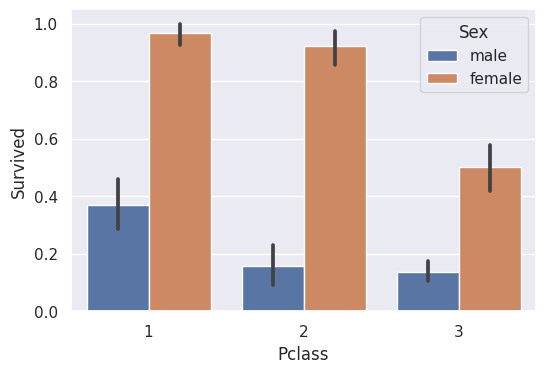

In [11]:
# Pclass - 1 = 1st, 2 = 2nd, 3 = 3rd
plt.figure(dpi=100)
sns.barplot(x='Pclass',y='Survived',data=train,hue='Sex')

<AxesSubplot:xlabel='Age', ylabel='Count'>

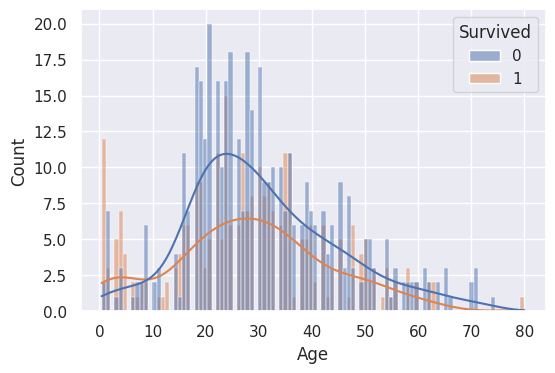

In [12]:
# Age - 0 to 76
plt.figure(dpi=100)
sns.histplot(data=train,x='Age',bins=100,kde=True,hue='Survived')

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

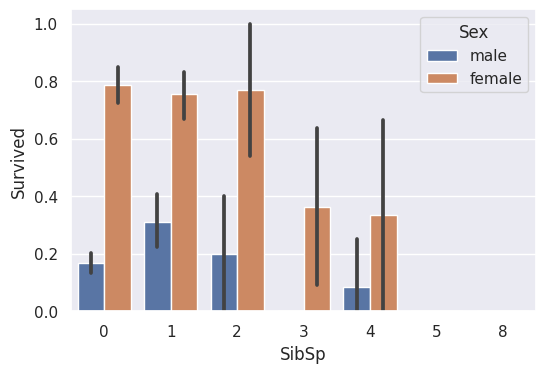

In [13]:
# SibSp - number of siblings / spouses aboard the Titanic
plt.figure(dpi=100)
sns.barplot(x='SibSp',y='Survived',data=train,hue='Sex')

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

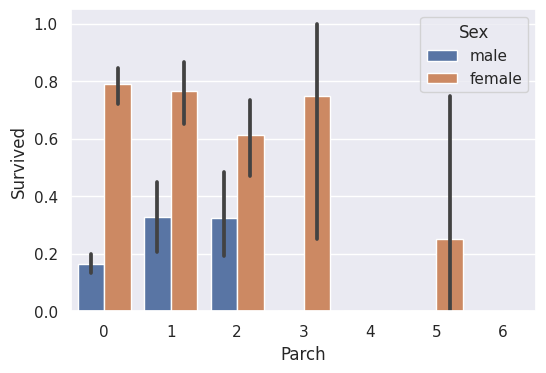

In [14]:
# Parch - number of parents / children aboard the Titanic
plt.figure(dpi=100)
sns.barplot(x='Parch',y='Survived',data=train,hue='Sex')

<AxesSubplot:xlabel='Fare', ylabel='Count'>

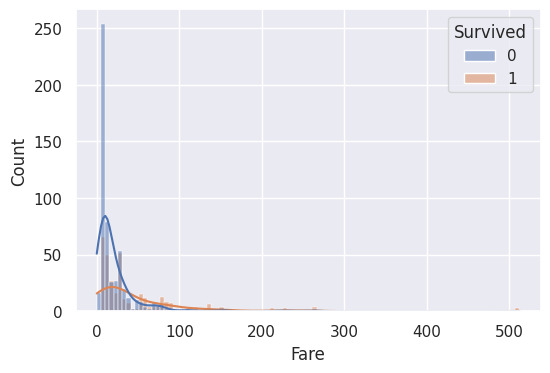

In [15]:
# Fare - 0 to 512
plt.figure(dpi=100)
sns.histplot(data=train,x='Fare',bins=100,kde=True,hue='Survived')

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

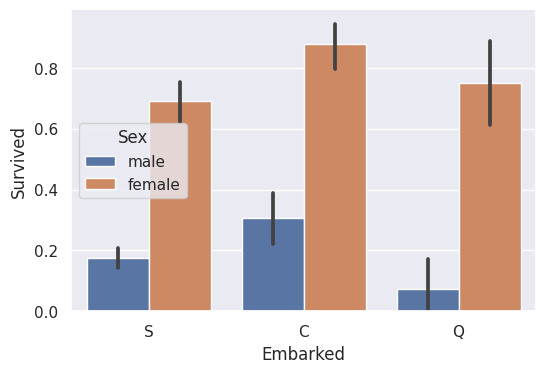

In [16]:
# Embarked - C = Cherbourg, Q = Queenstown, S = Southampton
plt.figure(dpi=100)
sns.barplot(x='Embarked',y='Survived',data=train,hue='Sex')

<AxesSubplot:>

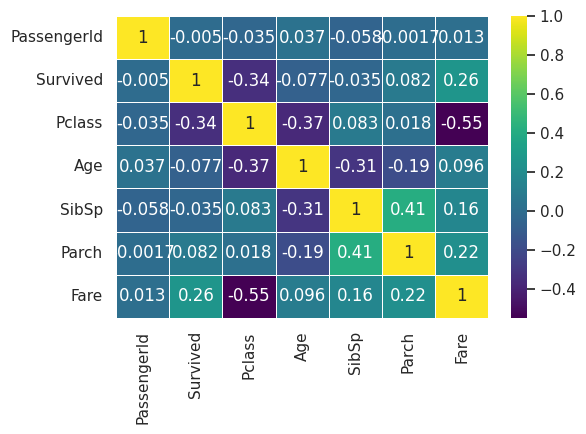

In [17]:
# Correlation between features
plt.figure(dpi=100)
sns.heatmap(train.corr(),linewidth=0.5,annot=True,cmap='viridis')

## Feature Engineering

In [18]:
# Combining Train Test Data for simplicity
train_test_data = pd.concat([train,test],axis=0,ignore_index=True)
train_test_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [19]:
# Age - Filling na
train_test_data['Age'] = train_test_data.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
train_test_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,25.0,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,25.0,0,0,359309,8.0500,NaN,S


In [20]:
# Deck
# Creating Deck column from the first letter of the Cabin column (M stands for Missing)
train_test_data['Deck'] = train_test_data['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

# Passenger in the T deck is changed to A
idx = train_test_data[train_test_data['Deck'] == 'T'].index
train_test_data.loc[idx, 'Deck'] = 'A'

# A, B and C decks are labeled as ABC because all of them have only 1st class passengers
# D and E decks are labeled as DE because both of them have similar passenger class distribution and same survival rate
# F and G decks are labeled as FG because of the same reason above
# M deck doesn't need to be grouped with other decks because it is very different from others and has the lowest survival rate.
train_test_data['Deck'] = train_test_data['Deck'].replace(['A', 'B', 'C'], 'ABC')
train_test_data['Deck'] = train_test_data['Deck'].replace(['D', 'E'], 'DE')
train_test_data['Deck'] = train_test_data['Deck'].replace(['F', 'G'], 'FG')

train_test_data['Deck'].value_counts()

M      1014
ABC     182
DE       87
FG       26
Name: Deck, dtype: int64

In [21]:
# Name
train_test_data['Title'] = train_test_data['Name'].apply(lambda name: name.split(', ')[1].split('.')[0])
train_test_data['Title'] =  train_test_data['Title'].replace(\
                            to_replace=['Rev','Dr','Col','Mlle','Major','Ms','Lady','Sir','Mme','Don',\
                            'Capt','the Countess','Jonkheer','Dona'],value='Other')
train_test_data['Title'].value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
Other      34
Name: Title, dtype: int64

In [22]:
# Family Size
train_test_data['Family_Size'] = train_test_data['SibSp'] + train_test_data['Parch'] + 1
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
train_test_data['Family_Size_Grouped'] = train_test_data['Family_Size'].map(family_map)
train_test_data['Family_Size_Grouped'].value_counts()

Alone     790
Small     437
Medium     47
Large      35
Name: Family_Size_Grouped, dtype: int64

In [23]:
# Ticket Type
train_test_data['TicketType'] = train_test_data['Ticket'].str.isnumeric()
train_test_data['TicketType'] =  train_test_data['TicketType'].replace(to_replace=True,value=1)
train_test_data['TicketType'] =  train_test_data['TicketType'].replace(to_replace=False,value=0)
train_test_data['TicketType'].value_counts()

1    957
0    352
Name: TicketType, dtype: int64

In [24]:
# Ticket Frequency
train_test_data['Ticket_Frequency'] = train_test_data.groupby('Ticket')['Ticket'].transform('count')
train_test_data['Ticket_Frequency'].value_counts()

1     713
2     264
3     147
4      64
5      35
7      35
6      24
8      16
11     11
Name: Ticket_Frequency, dtype: int64

In [25]:
# Fare - Filling na
train_test_data['Fare'].fillna(value=train_test_data['Fare'].median(),inplace=True)

In [26]:
# Embarked - Filling na
train_test_data['Embarked'].value_counts()
train_test_data['Embarked'].fillna(value='S',inplace=True)

In [27]:
# Encoding Survival Rate

# Extract Surname
def extract_surname(data):    
    families = []
    for i in range(len(data)):        
        name = data.iloc[i]
        if '(' in name:
            name_no_bracket = name.split('(')[0] 
        else:
            name_no_bracket = name
        family = name_no_bracket.split(',')[0]
        title = name_no_bracket.split(',')[1].strip().split(' ')[0]
        for c in string.punctuation:
            family = family.replace(c, '').strip()
        families.append(family)
    return families
df_all = train_test_data
df_all['Family'] = extract_surname(df_all['Name'])
df_train = df_all.loc[:890]
df_test = df_all.loc[891:]
dfs = [df_train, df_test]

# Creating a list of families and tickets that are occuring in both training and test set
non_unique_families = [x for x in df_train['Family'].unique() if x in df_test['Family'].unique()]
non_unique_tickets = [x for x in df_train['Ticket'].unique() if x in df_test['Ticket'].unique()]

df_family_survival_rate = df_train.groupby('Family')['Survived', 'Family','Family_Size'].median()
df_ticket_survival_rate = df_train.groupby('Ticket')['Survived', 'Ticket','Ticket_Frequency'].median()

family_rates = {}
ticket_rates = {}

for i in range(len(df_family_survival_rate)):
    # Checking a family exists in both training and test set, and has members more than 1
    if df_family_survival_rate.index[i] in non_unique_families and df_family_survival_rate.iloc[i, 1] > 1:
        family_rates[df_family_survival_rate.index[i]] = df_family_survival_rate.iloc[i, 0]

for i in range(len(df_ticket_survival_rate)):
    # Checking a ticket exists in both training and test set, and has members more than 1
    if df_ticket_survival_rate.index[i] in non_unique_tickets and df_ticket_survival_rate.iloc[i, 1] > 1:
        ticket_rates[df_ticket_survival_rate.index[i]] = df_ticket_survival_rate.iloc[i, 0]
        
mean_survival_rate = np.mean(df_train['Survived'])

train_family_survival_rate = []
train_family_survival_rate_NA = []
test_family_survival_rate = []
test_family_survival_rate_NA = []

for i in range(len(df_train)):
    if df_train['Family'][i] in family_rates:
        train_family_survival_rate.append(family_rates[df_train['Family'][i]])
        train_family_survival_rate_NA.append(1)
    else:
        train_family_survival_rate.append(mean_survival_rate)
        train_family_survival_rate_NA.append(0)
        
for i in range(len(df_test)):
    if df_test['Family'].iloc[i] in family_rates:
        test_family_survival_rate.append(family_rates[df_test['Family'].iloc[i]])
        test_family_survival_rate_NA.append(1)
    else:
        test_family_survival_rate.append(mean_survival_rate)
        test_family_survival_rate_NA.append(0)
        
df_train['Family_Survival_Rate'] = train_family_survival_rate
df_train['Family_Survival_Rate_NA'] = train_family_survival_rate_NA
df_test['Family_Survival_Rate'] = test_family_survival_rate
df_test['Family_Survival_Rate_NA'] = test_family_survival_rate_NA

train_ticket_survival_rate = []
train_ticket_survival_rate_NA = []
test_ticket_survival_rate = []
test_ticket_survival_rate_NA = []

for i in range(len(df_train)):
    if df_train['Ticket'][i] in ticket_rates:
        train_ticket_survival_rate.append(ticket_rates[df_train['Ticket'][i]])
        train_ticket_survival_rate_NA.append(1)
    else:
        train_ticket_survival_rate.append(mean_survival_rate)
        train_ticket_survival_rate_NA.append(0)
        
for i in range(len(df_test)):
    if df_test['Ticket'].iloc[i] in ticket_rates:
        test_ticket_survival_rate.append(ticket_rates[df_test['Ticket'].iloc[i]])
        test_ticket_survival_rate_NA.append(1)
    else:
        test_ticket_survival_rate.append(mean_survival_rate)
        test_ticket_survival_rate_NA.append(0)
        
df_train['Ticket_Survival_Rate'] = train_ticket_survival_rate
df_train['Ticket_Survival_Rate_NA'] = train_ticket_survival_rate_NA
df_test['Ticket_Survival_Rate'] = test_ticket_survival_rate
df_test['Ticket_Survival_Rate_NA'] = test_ticket_survival_rate_NA

for df in [df_train, df_test]:
    df['Survival_Rate'] = (df['Ticket_Survival_Rate'] + df['Family_Survival_Rate']) / 2
    df['Survival_Rate_NA'] = (df['Ticket_Survival_Rate_NA'] + df['Family_Survival_Rate_NA']) / 2   

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [28]:
train_test_data = pd.concat([df_train,df_test],axis=0,ignore_index=True)
train_test_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Family_Size_Grouped,TicketType,Ticket_Frequency,Family,Family_Survival_Rate,Family_Survival_Rate_NA,Ticket_Survival_Rate,Ticket_Survival_Rate_NA,Survival_Rate,Survival_Rate_NA
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,Small,0,1,Braund,0.383838,0,0.383838,0,0.383838,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,Small,0,2,Cumings,1.000000,1,1.000000,1,1.000000,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,Alone,0,1,Heikkinen,0.383838,0,0.383838,0,0.383838,0.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,Small,1,2,Futrelle,0.383838,0,0.383838,0,0.383838,0.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,Alone,1,1,Allen,0.383838,0,0.383838,0,0.383838,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,25.0,0,0,A.5. 3236,8.0500,...,Alone,0,1,Spector,0.383838,0,0.383838,0,0.383838,0.0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,...,Alone,0,3,Oliva y Ocana,0.383838,0,0.500000,1,0.441919,0.5
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,...,Alone,0,1,Saether,0.383838,0,0.383838,0,0.383838,0.0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,25.0,0,0,359309,8.0500,...,Alone,1,1,Ware,0.383838,0,0.383838,0,0.383838,0.0


In [29]:
# Drop useless columns
train_test_data.drop(['PassengerId','Survived','Name','SibSp','Parch','Ticket','Cabin',
                      'Family_Size','Family_Survival_Rate','Family_Survival_Rate_NA',
                     'Ticket_Survival_Rate','Ticket_Survival_Rate_NA','Family'],axis=1,inplace=True)

In [30]:
train_test_data.isnull().sum()

Pclass                 0
Sex                    0
Age                    0
Fare                   0
Embarked               0
Deck                   0
Title                  0
Family_Size_Grouped    0
TicketType             0
Ticket_Frequency       0
Survival_Rate          0
Survival_Rate_NA       0
dtype: int64

In [31]:
# Binning Continuous Features
train_test_data['Fare'] = pd.qcut(train_test_data['Fare'], 13, labels=np.arange(1,14))
train_test_data['Fare'] = train_test_data['Fare'].astype(dtype=int)
train_test_data['Age'] = pd.qcut(train_test_data['Age'], 10, labels=np.arange(1,11))
train_test_data['Age'] = train_test_data['Age'].astype(dtype=int)

In [32]:
# Get dummies 
dummies = pd.get_dummies(train_test_data[['Sex','Embarked','Deck','Title','Family_Size_Grouped']],drop_first=True)
dummies

,Sex_male,Embarked_Q,Embarked_S,Deck_DE,Deck_FG,Deck_M,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Family_Size_Grouped_Large,Family_Size_Grouped_Medium,Family_Size_Grouped_Small
0,1,0,1,0,0,1,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0,1,0,0,1,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,0,0,1
4,1,0,1,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1,0,1,0,0,1,0,1,0,0,0,0,0
1305,0,0,0,0,0,0,0,0,0,1,0,0,0
1306,1,0,1,0,0,1,0,1,0,0,0,0,0
1307,1,0,1,0,0,1,0,1,0,0,0,0,0


In [33]:
train_test_data = train_test_data.drop(['Sex','Embarked','Deck','Title','Family_Size_Grouped'],axis=1)
train_test_data_dum = pd.concat([train_test_data,dummies],axis=1,ignore_index=False)
train_test_data_dum

,Pclass,Age,Fare,TicketType,Ticket_Frequency,Survival_Rate,Survival_Rate_NA,Sex_male,Embarked_Q,Embarked_S,Deck_DE,Deck_FG,Deck_M,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Family_Size_Grouped_Large,Family_Size_Grouped_Medium,Family_Size_Grouped_Small
0,3,3,1,0,1,0.383838,0.0,1,0,1,0,0,1,0,1,0,0,0,0,1
1,1,8,12,0,2,1.000000,1.0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,3,5,4,0,1,0.383838,0.0,0,0,1,0,0,1,1,0,0,0,0,0,0
3,1,8,11,1,2,0.383838,0.0,0,0,1,0,0,0,0,0,1,0,0,0,1
4,3,8,4,1,1,0.383838,0.0,1,0,1,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,4,4,0,1,0.383838,0.0,1,0,1,0,0,1,0,1,0,0,0,0,0
1305,1,8,13,0,3,0.441919,0.5,0,0,0,0,0,0,0,0,0,1,0,0,0
1306,3,8,1,0,1,0.383838,0.0,1,0,1,0,0,1,0,1,0,0,0,0,0
1307,3,4,4,1,1,0.383838,0.0,1,0,1,0,0,1,0,1,0,0,0,0,0


In [34]:
X = train_test_data_dum.iloc[0:891]
y = train['Survived']
X_submission = train_test_data_dum.iloc[891:1309]

In [35]:
print(X.shape)
print(y.shape)
print(X_submission.shape)

(891, 20)
(891,)
(418, 20)


## Model Training

In [36]:
# Random Forest Classifier with tuned hyper parameters
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion='gini', 
                                           n_estimators=1100,
                                           max_depth=5,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=True,
                                           n_jobs=-1,
                                           verbose=1)
rfc.fit(X,y)
rfc.score(X,y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    1.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1100 out of 1100 | elapsed:    0.3s finished


0.8574635241301908

In [37]:
# Submission 
predictions = rfc.predict(X_submission)
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1100 out of 1100 | elapsed:    0.3s finished


#### Are you happy with the result?

#### Please upvote to support my work : )